In [207]:
import pandas as pd
import torch
from torch.utils.data import Dataset
import matplotlib.pyplot as plt

In [208]:
X = torch.linspace(0, 2*torch.pi, 256)  # 生成 100 个点，在 [0, π] 区间内均匀分布
X = torch.tensor(X, dtype=torch.float64).unsqueeze(1)
y = torch.sin(X)  # 计算 sin(x)


X1=torch.cat([X**i for i in range(1, 6)], dim=1)  # 生成多项式特征  

# Z-score 标准化  
def z_score_standardization(X):  
    mean = X.mean(dim=0, keepdim=True)  # 每列的均值  
    std = X.std(dim=0, keepdim=True)    # 每列的标准差  
    return (X - mean) / std  

X1 = z_score_standardization(X1)  

class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        x = self.data[index]
        y = self.labels[index]
        return x, y

train_data=CustomDataset(X1,y)
train_iter=torch.utils.data.DataLoader(train_data, batch_size=16)


/tmp/ipykernel_3761674/1287713038.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float64).unsqueeze(1)


In [209]:
w = torch.normal(0, 0.1, size=(5, 1), dtype=torch.float64, requires_grad=True)
b = torch.zeros(1, dtype=torch.float64, requires_grad=True)

In [210]:

#定义模型
def model(X,w,b):
    return torch.matmul(X,w)+b
#定义loss
def loss(y,y_hat):
    return torch.abs(y-y_hat)/2
#定义优化器
def youhua(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()
            
# 定义的 backward 函数
def custom_backward(loss, params):
    # 清除之前计算的梯度
    for param in params:
        param.grad = torch.zeros_like(param)
    # 计算损失对每个参数的梯度
    loss_grad = torch.autograd.grad(loss, params, create_graph=True)
    # 将计算得到的梯度应用到参数上
    for param, grad in zip(params, loss_grad):
        param.grad = grad

In [211]:
lr = 0.008
num_epochs = 25000

l_2=torch.tensor([1000],dtype=torch.float64)
y_3 = torch.tensor([10000], dtype=torch.float64)  
w_1,b_1=w,b
for x in range(num_epochs):
    for data,label in train_iter:
        y_hat=model(data,w,b)
        l=loss(label,y_hat)
        l=l.sum()
        custom_backward(l,[w,b])
        youhua([w,b],lr,16)
    with torch.no_grad():
        y_2 = model(X1, w, b)
        y=torch.tensor(y)
        train_l = loss(y, y_2)
        print(f'epoch {x + 1}, loss {float(train_l.mean()):f}')
        if train_l.mean()<l_2.mean():
            y_3=y_2
            l_2=train_l
            w_1,b_1=w,b
            print(f'epoch {x + 1}')
            
print(w_1,'\n',b_1)

/tmp/ipykernel_3761674/3713829546.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y=torch.tensor(y)


epoch 1, loss 0.321101
epoch 1
epoch 2, loss 0.265566
epoch 2
epoch 3, loss 0.240644
epoch 3
epoch 4, loss 0.228041
epoch 4
epoch 5, loss 0.220672
epoch 5
epoch 6, loss 0.216011
epoch 6
epoch 7, loss 0.212852
epoch 7
epoch 8, loss 0.210219
epoch 8
epoch 9, loss 0.207973
epoch 9
epoch 10, loss 0.206161
epoch 10
epoch 11, loss 0.204620
epoch 11
epoch 12, loss 0.203222
epoch 12
epoch 13, loss 0.201855
epoch 13
epoch 14, loss 0.200573
epoch 14
epoch 15, loss 0.199380
epoch 15
epoch 16, loss 0.198218
epoch 16
epoch 17, loss 0.197119
epoch 17
epoch 18, loss 0.196019
epoch 18
epoch 19, loss 0.194936
epoch 19
epoch 20, loss 0.193874
epoch 20
epoch 21, loss 0.192809
epoch 21
epoch 22, loss 0.191811
epoch 22
epoch 23, loss 0.190765
epoch 23
epoch 24, loss 0.189793
epoch 24
epoch 25, loss 0.188827
epoch 25
epoch 26, loss 0.187868
epoch 26
epoch 27, loss 0.186923
epoch 27
epoch 28, loss 0.185978
epoch 28
epoch 29, loss 0.185049
epoch 29
epoch 30, loss 0.184131
epoch 30
epoch 31, loss 0.183226
epoc

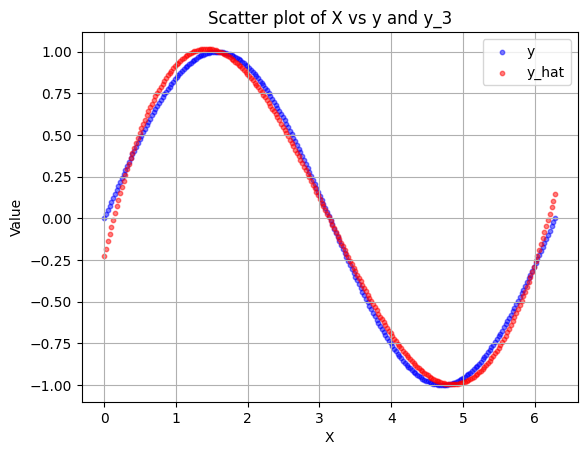

In [212]:
X_np = X.numpy()
y_np = y.numpy()
y_3_np=y_3.numpy()

# 绘制散点图
plt.scatter(X_np, y_np, alpha=0.5, c='blue', label='y', s=10)  # 设置点的大小为 20
plt.scatter(X_np, y_3_np, alpha=0.5, c='red', label='y_hat', s=10)  # 设置点的大小为 20

plt.title('Scatter plot of X vs y and y_3')
plt.xlabel('X')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()
